# AquaQuest AI: Part 1  

**Created by:** AquaQuest Team  

**Team Members:** Chengheng Li Chen, Jingjing Ye, Wenwen Yang, Yao Xu Chen  

Welcome to the first part of the AquaQuest AI project!

This notebook contains all the code and methodologies used to develop a **short-term water consumption forecasting model**.  

To achieve this, we leverage powerful machine learning libraries such as **TensorFlow** and **scikit-learn** for clustering and model training. Additionally, we have developed a custom library for visualization, located in the `util.py` file. This library simplifies the creation of user-friendly, interactive plots using **Plotly**. For more details on the available functions and their usage, please refer to the documentation within the `util.py` file.  

Our goal for this part is to provide an efficient and accurate forecasting solution while ensuring the code is accessible and easy to interpret. We hope this notebook serves as a valuable resource for understanding the development process and the tools used in this project.  

This notebook consists of three main parts:  

- **Data Preprocessing:**  
  - In this section, we clean the data and select a small subset of the available data from the file `daily_dataset.csv`.  

- **Clustering:**  
  - We aim to train a model based on data with similar patterns (referred to as clusters). This approach allows us to separate profiles with high water consumption from those with lower consumption, enabling better generalization across clusters.  

- **Model Creation:**  
  - This section explores several model architectures, including **DFFNN**, **LSTM**, and **GRU**, for water consumption prediction. We evaluate the accuracy of these models across the dataset and focus on using the cluster mean to determine if the models can generalize effectively.  

Further explanations and details can be found in each respective section of the notebook.  



## Preprocessing of Data  

The first step in this notebook focuses on **data preprocessing**. Given the large volume of data available, our strategy is to drop unuseful or irrelevant data. This allows us to work with a smaller, more manageable subset of the dataset, which is sufficient for the training process.  

### Libraries used

In [ ]:
import sys
print("Python version:", sys.version)

!pip install -r requirements.txt

In [118]:
import pandas as pd
from utils import plot_time_series

In [119]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Reading data

In [120]:
data_df = pd.read_csv("daily_dataset.csv", low_memory=False)

In [121]:
data_df.head()

Secció censal/Sección censal/Census section Districte/Distrito/District  \
0                                  0801501001                          01   
1                                  0801501001                          01   
2                                  0801501001                          01   
3                                  0801501001                          01   
4                                  0801501001                          01   

  Municipi/Municipio/Municipality Data/Fecha/Date  \
0                        BADALONA      2021-05-26   
1                        BADALONA      2021-05-26   
2                        BADALONA      2021-05-27   
3                        BADALONA      2021-05-27   
4                        BADALONA      2021-05-28   

                       Ús/Uso/Use  \
0  Comercial/Comercial/Commercial   
1     Domèstic/Doméstico/Domestic   
2  Comercial/Comercial/Commercial   
3     Domèstic/Doméstico/Domestic   
4  Comercial/Comercial/Commercial   

   Nombre de comptadors/Número de contadores/Number of meters  \
0                                                 12            
1                                                161            
2                                                 12            
3                                                173            
4                                                 12            

   Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)  
0                                                843                                  
1                                               4891                                  
2                                               2173                                  
3                                              15458                                  
4                                               1836

### Visualization of data

 We want to determine the **number of census sections** present in the original file.  


In [122]:
data_df["Secció censal/Sección censal/Census section"].nunique()

1426

In [123]:
data_df["Secció censal/Sección censal/Census section"].unique()

array(['0801501001', '0801501002', '0801501003', ..., '0826301006',
       '<NULL>', nan], dtype=object)

We will filter the data based on specific usage categories to facilitate more focused and detailed analyses.

In [124]:
domestic_use = data_df[data_df['Ús/Uso/Use'] == 'Domèstic/Doméstico/Domestic']
comercials_use =  data_df[data_df['Ús/Uso/Use'] == 'Comercial/Comercial/Commercial']
industrial_use =  data_df[data_df['Ús/Uso/Use'] == 'Industrial/Industrial/Industrial']

#Assign working dataframe
df = domestic_use.copy()
path = "domestic/"

To facilitate data processing, we will focus on the variable **Average Consumption per Meter**, which is calculated as follows:

$$
\text{Average Consumption per Meter} = \frac{\text{Accumulated Consumption (L/day)}}{\text{Number of Meters}}
$$

This formula allows us to determine the average daily consumption per meter by dividing the total accumulated consumption, measured in liters per day, by the number of meters.

In [125]:
# Assuming domestic_use is your original DataFrame
df['Average Consumption per Meter'] = (
    df['Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)'] /
    df['Nombre de comptadors/Número de contadores/Number of meters']
)

# Create a new DataFrame with the selected columns
df_train = df[['Secció censal/Sección censal/Census section', 'Data/Fecha/Date', 'Municipi/Municipio/Municipality', 'Average Consumption per Meter']].copy()

df_train.head()

Secció censal/Sección censal/Census section Data/Fecha/Date  \
1                                  0801501001      2021-05-26   
3                                  0801501001      2021-05-27   
5                                  0801501001      2021-05-28   
7                                  0801501001      2021-05-29   
9                                  0801501001      2021-05-30   

  Municipi/Municipio/Municipality  Average Consumption per Meter  
1                        BADALONA                      30.378882  
3                        BADALONA                      89.352601  
5                        BADALONA                      86.545977  
7                        BADALONA                      93.737143  
9                        BADALONA                      94.885714

In [126]:
df_train.tail()

Secció censal/Sección censal/Census section Data/Fecha/Date  \
3574948                                         NaN      2023-12-27   
3574951                                         NaN      2023-12-28   
3574954                                         NaN      2023-12-29   
3574957                                         NaN      2023-12-30   
3574960                                         NaN      2023-12-31   

        Municipi/Municipio/Municipality  Average Consumption per Meter  
3574948                         PALLEJA                      54.615385  
3574951                         PALLEJA                      60.676923  
3574954                         PALLEJA                      61.884615  
3574957                         PALLEJA                      64.823077  
3574960                         PALLEJA                      80.738462

Let's explore the shape of some time series by visualizing the average usage of selected census sections.  
We will use the `plot_time_series` function from our custom library to generate these visualizations.


In [127]:
plot_time_series("0801501001", df_train)

In [128]:
plot_time_series("0801501003", df_train)

### Data Cleaning  
After visualizing the data, we proceed to clean it by dropping irrelevant values that will not contribute to the training phase.  

#### Null Values  
We start by searching for null values in the dataset, specifically focusing on rows where the average consumption per meter is missing.

In [129]:
null_count = df_train['Average Consumption per Meter'].isnull().sum()
print(f'Number of null values in Average Consumption per Meter: {null_count}')

Number of null values in Average Consumption per Meter: 0


#### Negative values


Next, we check the dataset for any negative values.  


In [130]:
# Check for negative values in 'Average Consumption per Meter'
negative_count = (df_train['Average Consumption per Meter'] < 0).sum()
print(f'Number of negative values in Average Consumption per Meter: {negative_count}')

Number of negative values in Average Consumption per Meter: 2204


As mentioned earlier, due to the large volume of data, we have opted to drop census sections with negative values. However, alternative approaches could also be considered, such as:  
- Replacing negative values with the median of the dataset.  
- Applying the absolute value to transform negative values into positive ones.

In [131]:
negative_rows = df_train[df_train['Average Consumption per Meter'] < 0]

unique_census_sections = negative_rows['Secció censal/Sección censal/Census section'].unique()

df_train = df_train[~df_train['Secció censal/Sección censal/Census section'].isin(unique_census_sections)]

#### Starting and Ending Days  

To ensure consistency in our dataset, we aim to align the starting and ending days of the data.

By aligning the starting and ending days, we ensure that all data points are properly synchronized, enabling better comparisons and model performance.  

In [132]:
# Ensure the DataFrame is sorted by date
df_sorted = df_train.sort_values(by='Data/Fecha/Date')

# Group by 'Secció censal/Sección censal/Census section' and get the first date
first_dates = df_sorted.groupby('Secció censal/Sección censal/Census section')['Data/Fecha/Date'].min().reset_index()

# Group by the first date and aggregate census sections into lists
date_to_census_map = first_dates.groupby('Data/Fecha/Date')['Secció censal/Sección censal/Census section'].apply(list).to_dict()

# Display the dictionary
for key in date_to_census_map:
  print(f"Start date: {key}, Number of census Sections: {len(date_to_census_map[key])}")

Start date: 2021-01-01, Number of census Sections: 963
Start date: 2021-04-20, Number of census Sections: 1
Start date: 2021-05-18, Number of census Sections: 73
Start date: 2021-05-19, Number of census Sections: 1
Start date: 2021-05-26, Number of census Sections: 112
Start date: 2021-05-27, Number of census Sections: 2
Start date: 2021-06-01, Number of census Sections: 85
Start date: 2022-08-27, Number of census Sections: 1
Start date: 2022-09-08, Number of census Sections: 1
Start date: 2023-03-10, Number of census Sections: 1


In [133]:
# Ensure the DataFrame is sorted by date
df_sorted = df_train.sort_values(by='Data/Fecha/Date')

# Group by 'Secció censal/Sección censal/Census section' and get the first date
first_dates = df_sorted.groupby('Secció censal/Sección censal/Census section')['Data/Fecha/Date'].max().reset_index()

# Group by the first date and aggregate census sections into lists
date_to_census_map = first_dates.groupby('Data/Fecha/Date')['Secció censal/Sección censal/Census section'].apply(list).to_dict()

# Display the dictionary
for key in date_to_census_map:
  print(f"End date: {key}, Number of census Sections: {len(date_to_census_map[key])}")


End date: 2023-12-31, Number of census Sections: 1240


We observed that the ending date is consistent across all census entries. Therefore, we have decided to set the cutoff date to 2021-06-01 to simplify data processing. This decision was made due to the large volume of data available, and our preliminary experiments indicate that removing these values will not compromise the accuracy of our model.

In [134]:
# Convert 'Data/Fecha/Date' to datetime format
df_train['Data/Fecha/Date'] = pd.to_datetime(df_train['Data/Fecha/Date'])

# Define the cutoff date
cutoff_date = pd.to_datetime('2021-06-01')

# Filter the DataFrame to include only rows on or after the cutoff date
df_train = df_train[df_train['Data/Fecha/Date'] >= cutoff_date]

#### Final Setup  

We are reaching the end of this section, where we finalize the cleaning process by dropping irrelevant data and formatting the dataset.  


In [135]:
df_train = df_train[df_train['Secció censal/Sección censal/Census section'] != '<NULL>']

We reformat our dataset to ensure it is structured appropriately for analysis. Specifically, we organize the data such that:  
- The **X-axis** represents the census sections along with their corresponding cities.  
- The **Y-axis** represents the time dimension.  


In [136]:
# Create a new column that combines census section and city
df_train['Census - City'] = df_train['Secció censal/Sección censal/Census section'] + ' - ' + df_train['Municipi/Municipio/Municipality']

# Pivot the DataFrame using the combined column
df_train = df_train.pivot(index='Data/Fecha/Date', columns='Census - City', values='Average Consumption per Meter')

#Drop colums with null values
df_train = df_train.dropna(axis=1, how='any')

#Saving it for future use
df_train.to_csv(path + 'data.csv', index=True)

# Display the pivoted DataFrame
df_train.head()

Census - City    0801501001 - BADALONA  0801501002 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   93.830508             151.266234   
2021-06-02                   87.361582             141.922078   
2021-06-03                   92.289773             150.285714   
2021-06-04                   90.508475             141.448052   
2021-06-05                   98.250000             152.292208   

Census - City    0801501003 - BADALONA  0801501004 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                  148.735849             113.851064   
2021-06-02                  198.915094             123.241135   
2021-06-03                  158.783019             122.773050   
2021-06-04                  155.330189             128.666667   
2021-06-05                  165.037736             126.702128   

Census - City    0801501005 - BADALONA  0801501007 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   57.342308             144.462121   
2021-06-02                   53.919540             135.833333   
2021-06-03                   56.603053             131.590909   
2021-06-04                   50.359848             124.787879   
2021-06-05                   56.477273             147.007576   

Census - City    0801502003 - BADALONA  0801502004 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   83.238372              47.428152   
2021-06-02                   83.383721              48.428152   
2021-06-03                   85.825581              46.536657   
2021-06-04                   78.029070              43.695015   
2021-06-05                   79.774566              44.469208   

Census - City    0801502007 - BADALONA  0801502008 - BADALONA  ...  \
Data/Fecha/Date                                                ...   
2021-06-01                   26.475248              88.960432  ...   
2021-06-02                   23.590476              79.261649  ...   
2021-06-03                   23.435185              79.357143  ...   
2021-06-04                   23.000000              80.775000  ...   
2021-06-05                   20.026549             102.289286  ...   

Census - City    0810106032 - L'HOSPITALET LLOBR.  0815701001 - PALLEJA  \
Data/Fecha/Date                                                           
2021-06-01                              15.448000             73.439669   
2021-06-02                              15.714667             75.266116   
2021-06-03                              16.152000             76.585124   
2021-06-04                              14.802667             73.166942   
2021-06-05                              15.890667             82.693069   

Census - City    0815701002 - PALLEJA  0815701003 - PALLEJA  \
Data/Fecha/Date                                               
2021-06-01                  44.363158             47.087954   
2021-06-02                  43.694737             54.818356   
2021-06-03                  43.627632             53.080306   
2021-06-04                  42.973684             47.502868   
2021-06-05                  47.876316             52.697897   

Census - City    0815701004 - PALLEJA  0815701005 - PALLEJA  \
Data/Fecha/Date                                               
2021-06-01                 518.503650             30.630854   
2021-06-02                 523.058394             30.404959   
2021-06-03                 574.072993             31.276860   
2021-06-04                 696.642336             30.483471   
2021-06-05                 720.043796             30.830579   

Census - City    0815801001 - EL PAPIOL  0819401002 - BADALONA  \
Data/Fecha/Date                                                  
2021-06-01                   195.045632              38.871795   
2021-06-02                   317.840939              40.358974   
2021-06-03 

## Data Clustering

Our preliminary experiments indicate that training a single prediction model for all census sections collectively is not optimal. A more effective approach is to train models for specific clusters of census sections that exhibit similar data patterns. This allows us to evaluate whether the knowledge gained from one cluster can be transferred to other clusters, or if it is necessary to develop distinct models for each cluster.  

To identify these clusters, we will perform clustering using the **K-Means algorithm**, a widely used and effective technique for this type of application. By grouping census sections with similar patterns, we aim to improve the accuracy and efficiency of our predictive models.  

### Libraries used for clustering and initial setup


In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from utils import plot_cluster_statistics
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [138]:
path = "domestic/"

df_train = pd.read_csv(path + 'data.csv', index_col='Data/Fecha/Date')

### Standarizing

Before performing clustering, it is essential to standardize the data to improve the performance of the K-Means algorithm.  


In [139]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train)

### Elbow Method  

To determine the optimal number of clusters for our dataset, we will use the **Elbow Method**, a widely used and effective technique in clustering analysis.  

The Elbow Method involves running the K-Means algorithm on the dataset for a range of cluster numbers (K) and calculating the **Within-Cluster Sum of Squares (WCSS)** for each value of K. WCSS measures the compactness of the clusters, with lower values indicating tighter clusters.  

When we plot the WCSS values against the number of clusters, the graph typically forms a curve resembling an elbow. The "elbow point" is the value of K where the rate of decrease in WCSS slows down significantly. This point represents the optimal number of clusters, as adding more clusters beyond this point does not significantly improve the model's performance.  

By identifying the elbow point, we can select the most appropriate number of clusters for our analysis, ensuring a balance between model complexity and performance.  

In [140]:
n_range = 30

def elbow_method(df_scaled, n_range):
  inertia = []
  for n in range(1, n_range):
      kmeans = KMeans(n_clusters=n, random_state=42)
      kmeans.fit(df_scaled)
      inertia.append(kmeans.inertia_)

  # Create a Plotly figure
  fig = go.Figure()

  # Add a scatter plot
  fig.add_trace(go.Scatter(
      x=list(range(1, n_range)),
      y=inertia,
      mode='lines+markers',
      marker=dict(color='blue'),
      line=dict(color='blue'),
      name='Inertia'
  ))

  # Update layout
  fig.update_layout(
      title='Elbow Method',
      xaxis_title='Number of clusters',
      yaxis_title='Inertia',
      template='plotly_white'
  )

  # Show the plot
  fig.show()

elbow_method(df_scaled, n_range)

Looking at the elbow plot, it appears that 10 clusters is a reasonable choice for the number of clusters.  


### Clustering  

We will apply the classical **K-Means clustering** method to group the data into clusters and analyze the results by displaying the number of items in each cluster.  

In [141]:
n = 10
def cluster_knn(df_train, n):
  cluster_df = df_train.copy()

  cluster_df = cluster_df.T

  data_scaled = scaler.fit_transform(cluster_df)
  # Step 2: Cluster the data using K-Means
  kmeans = KMeans(n_clusters=n, random_state=42)
  cluster_df['Cluster'] = kmeans.fit_predict(data_scaled)

  # Step 3: Prepare data for KNN
  # Extract features and labels
  X = data_scaled
  y = cluster_df['Cluster']

  # Step 5: Create a mapping of cluster ID to census IDs
  cluster_mapping = {}
  for cluster_id in range(n):
      census_ids = cluster_df[cluster_df['Cluster'] == cluster_id].index.tolist()
      cluster_mapping[cluster_id] = census_ids

  return cluster_mapping, data_scaled, cluster_df


cluster_mapping, data_scaled, cluster_df = cluster_knn(df_train, n)

print([len(cluster_mapping[i]) for i in cluster_mapping])

[667, 1, 73, 3, 1, 1, 479, 1, 10, 1]


### Cluster Statistics  

In our plotting library, we have defined a function called `plot_cluster_statistics`. This function provides a detailed visualization of the clusters by plotting the following:  

1. **Cluster Means**:  
   - The mean of the cluster is represented by a **blue line**, giving an overview of the average behavior of the census sections within the cluster.  

2. **Standard Deviation (±STD)**:  
   - The **+STD** (mean plus standard deviation) is shown as a **green line**, while the **-STD** (mean minus standard deviation) is represented by a **red line**. These lines provide insight into the variability within the cluster, helping to understand the range of water consumption patterns.  

3. **Sample Census Sections**:  
   - The function also includes a secondary plot that samples up to **5 census sections** from the cluster (if available) and overlays their individual water consumption patterns on the graph. This allows us to visually assess the shape and variability of water consumption for specific census sections within the cluster.  

This dual-plot approach provides both a statistical summary and a more granular view of the data, enabling a deeper understanding of the water consumption patterns within each cluster.

In [142]:
for i in cluster_mapping:
  print(f"Cluster {i}: {cluster_mapping[i]}")
  plot_cluster_statistics(cluster_mapping[i], df_train)

Cluster 0: ['0801502007 - BADALONA', '0801502011 - BADALONA', '0801503001 - BADALONA', '0801504008 - BADALONA', '0801504010 - BADALONA', '0801505004 - BADALONA', '0801507003 - BADALONA', '0801507018 - BADALONA', '0801507020 - BADALONA', '0801507021 - BADALONA', '0801507022 - BADALONA', '0801507029 - BADALONA', '0801507030 - BADALONA', '0801507031 - BADALONA', '0801508004 - BADALONA', '0801508006 - BADALONA', '0801508009 - BADALONA', '0801508011 - BADALONA', '0801509005 - BADALONA', '0801509009 - BADALONA', '0801509013 - BADALONA', '0801509014 - BADALONA', '0801509016 - BADALONA', '0801509024 - BADALONA', '0801509026 - BADALONA', '0801509028 - BADALONA', '0801509031 - BADALONA', '0801509033 - BADALONA', '0801509035 - BADALONA', '0801509049 - BADALONA', '0801509052 - BADALONA', '0801509054 - BADALONA', '0801509058 - BADALONA', '0801901003 - BARCELONA', '0801901004 - BARCELONA', '0801901009 - BARCELONA', '0801901013 - BARCELONA', '0801901035 - BARCELONA', '0801901036 - BARCELONA', '080190

Cluster 1: ['0801506002 - BADALONA']


Cluster 2: ['0801501001 - BADALONA', '0801501002 - BADALONA', '0801501003 - BADALONA', '0801501004 - BADALONA', '0801501007 - BADALONA', '0801502003 - BADALONA', '0801502008 - BADALONA', '0801502012 - BADALONA', '0801503004 - BADALONA', '0801503006 - BADALONA', '0801503007 - BADALONA', '0801503008 - BADALONA', '0801503009 - BADALONA', '0801503013 - BADALONA', '0801504002 - BADALONA', '0801504004 - BADALONA', '0801504007 - BADALONA', '0801504012 - BADALONA', '0801504016 - BADALONA', '0801505006 - BADALONA', '0801505007 - BADALONA', '0801506001 - BADALONA', '0801507004 - BADALONA', '0801507005 - BADALONA', '0801507007 - BADALONA', '0801507010 - BADALONA', '0801507011 - BADALONA', '0801507013 - BADALONA', '0801507015 - BADALONA', '0801508001 - BADALONA', '0801508005 - BADALONA', '0801508007 - BADALONA', '0801509003 - BADALONA', '0801509015 - BADALONA', '0801509017 - BADALONA', '0801509038 - BADALONA', '0801509042 - BADALONA', '0801509057 - BADALONA', '0801902077 - BARCELONA', '0801903106 

Cluster 3: ['0801904056 - BARCELONA', '0801905004 - BARCELONA', '0815701004 - PALLEJA']


Cluster 4: ['0801901019 - BARCELONA']


Cluster 5: ['0801907005 - BARCELONA']


Cluster 6: ['0801501005 - BADALONA', '0801502004 - BADALONA', '0801502010 - BADALONA', '0801502015 - BADALONA', '0801503003 - BADALONA', '0801503010 - BADALONA', '0801503014 - BADALONA', '0801504001 - BADALONA', '0801504003 - BADALONA', '0801504005 - BADALONA', '0801504006 - BADALONA', '0801504009 - BADALONA', '0801504011 - BADALONA', '0801504013 - BADALONA', '0801504014 - BADALONA', '0801504015 - BADALONA', '0801505002 - BADALONA', '0801505003 - BADALONA', '0801505005 - BADALONA', '0801506003 - BADALONA', '0801507002 - BADALONA', '0801507006 - BADALONA', '0801507008 - BADALONA', '0801507009 - BADALONA', '0801507023 - BADALONA', '0801507024 - BADALONA', '0801508003 - BADALONA', '0801508008 - BADALONA', '0801508012 - BADALONA', '0801509008 - BADALONA', '0801509011 - BADALONA', '0801509012 - BADALONA', '0801509018 - BADALONA', '0801509019 - BADALONA', '0801509020 - BADALONA', '0801509021 - BADALONA', '0801509022 - BADALONA', '0801509023 - BADALONA', '0801509025 - BADALONA', '0801509027 -

Cluster 7: ['0801910055 - BARCELONA']


Cluster 8: ['0801509004 - BADALONA', '0801905001 - BARCELONA', '0801905002 - BARCELONA', '0801905003 - BARCELONA', '0801905005 - BARCELONA', '0801905032 - BARCELONA', '0801908048 - BARCELONA', '0801908109 - BARCELONA', '0815801001 - EL PAPIOL', '0820506001 - BARCELONA']


Cluster 9: ['0801901043 - BARCELONA']


#### Conclusions of the Clustering  

From the clustering results and the corresponding plots, we can draw the following conclusions:  

- **Cluster 0**:  
  This cluster represents regular domestic water usage, with consumption ranging between **10 to 100 liters per day**. This aligns with typical water usage for normal households. Due to its stability and representativeness, we will likely use this cluster to train our prediction model.  

- **Cluster 8**:  
  This cluster corresponds to medium water consumption, with values ranging between **100 to 1000 liters per day**. It likely represents households or small businesses with slightly higher water demands. Additionally, this cluster exhibits some **seasonal patterns**, with higher water consumption during the summer months.  

- **Cluster 3**:  
  This cluster is characterized by **strong seasonal water usage patterns**, such as those seen in areas with swimming pools or regions with high water consumption during the summer. The plots show a significant increase in water usage during summer months, which supports this hypothesis.  

- **Other Clusters**:  
  The remaining clusters display irregular patterns, potentially caused by **malfunctioning water meters** or other anomalies. For example, some meters report extreme values above **5000 liters per day**, followed by undefined or erratic patterns. These clusters may require further investigation to identify the underlying causes of these anomalies.  

#### Additional Observations  

Seasonal patterns are expected to appear in most clusters, although they are more pronounced in some clusters than others. However, it is important to note that we are not including features such as the **month** or **day of the year** in our model. Instead, we are training a **univariate model** that focuses on short-term water consumption predictions using limited data (approximately 12 data points).  

Given this setup, we expect the trained model to extract and learn patterns from the data effectively, even without explicit seasonal indicators. Once trained, the model will be evaluated across all clusters to assess its ability to generalize and adapt to different water consumption patterns.

### Clustering Benchmark Statistics  

To evaluate the quality of our clustering results, we will use the **Silhouette Score**, a widely used metric for assessing clustering performance.  

The **Silhouette Score** measures how well each data point fits within its assigned cluster compared to other clusters. It is calculated for each data point and then averaged across all points to provide an overall score. The score ranges from **-1 to +1**, where:  
- **+1** indicates that the data point is well-matched to its own cluster and poorly matched to other clusters.  
- **0** indicates that the data point lies on or near the boundary between two clusters.  
- **-1** indicates that the data point may have been assigned to the wrong cluster.  

The Silhouette Score is particularly useful because it considers both the **cohesion** (how close data points are within the same cluster) and the **separation** (how distinct a cluster is from others). A higher score suggests better-defined and more meaningful clusters.  


In [143]:
silhouette_avg = silhouette_score(data_scaled, cluster_df['Cluster'])

print(f"The average silhouette score is: {silhouette_avg:.2f}")

# Interpretation
if silhouette_avg > 0.5:
    print("The clustering solution is good with well-separated clusters.")
elif silhouette_avg > 0.2:
    print("The clustering solution is reasonable, but there might be some overlap between clusters.")
else:
    print("The clustering solution is poor, with significant overlap between clusters.")

The average silhouette score is: 0.45
The clustering solution is reasonable, but there might be some overlap between clusters.


## Model Training  

In this section, we will leverage the insights gathered from the previous analysis to identify a suitable deep learning architecture for our task. We will train several models using our dataset, evaluate their performance, and select the best-performing model for further use.  

### Libraries to use and inital setup

In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
import sklearn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,  GRU, Dense, Dropout, Flatten


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import keras_tuner as kt
from keras.models import load_model


import plotly.graph_objects as go
from plotly.subplots import make_subplots

from tqdm import tqdm

#### Modifiable Parameters  

Below is a list of modifiable parameters that can be adjusted to optimize the prediction model. However, we also provide recommended default values for these parameters.  

- **`n_past`**:  
  Represents the number of previous data points required to predict the target. For example, in a daily time series, `n_past` would indicate the number of past days used to predict the next day (`n_past + 1`).  
  - **Recommended Value**: 12 (i.e., use data from the past 12 days to predict the next day).  

- **`cluster_id`**:  
  The ID of the cluster used to train the model. This allows the model to focus on specific clusters with similar patterns, as identified during the clustering process.  
  - **Recommended Value**: 0 (as Cluster 0 represents regular domestic water usage and is stable for initial training).  

In [145]:
cluster_id = 0
n_past = 12

#### Retrieving Data  

To simplify execution and avoid preprocessing the data every time the notebook is run, we will load the dataset directly from the **`data.csv`** file. This file was created at the end of the preprocessing process and contains the cleaned and prepared data ready for use in training and evaluation.  

In [146]:
path = "domestic/"

df_train = pd.read_csv(path + 'data.csv', index_col='Data/Fecha/Date')

cluster_columns = cluster_mapping[cluster_id]

# Extract the data for the cluster
cluster_data = df_train[cluster_columns]

x, y = cluster_data.shape

cluster_data.head()

0801502007 - BADALONA  0801502011 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   26.475248              16.456204   
2021-06-02                   23.590476              17.170909   
2021-06-03                   23.435185              16.133094   
2021-06-04                   23.000000              15.571942   
2021-06-05                   20.026549              17.063830   

                 0801503001 - BADALONA  0801504008 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   18.436275              21.008658   
2021-06-02                   19.320588              22.542735   
2021-06-03                   19.249755              23.872881   
2021-06-04                   19.683643              23.741525   
2021-06-05                   23.265426              27.561181   

                 0801504010 - BADALONA  0801505004 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   37.639344              21.051988   
2021-06-02                   31.409836              20.603659   
2021-06-03                   32.311475              22.600610   
2021-06-04                   32.557377              19.932927   
2021-06-05                   30.193548              21.378049   

                 0801507003 - BADALONA  0801507018 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   66.892857              25.528736   
2021-06-02                   57.200000              24.459770   
2021-06-03                   66.066667              26.770115   
2021-06-04                   63.100000              27.310345   
2021-06-05                   71.100000              26.919540   

                 0801507020 - BADALONA  0801507021 - BADALONA  ...  \
Data/Fecha/Date                                                ...   
2021-06-01                   23.912088              48.761905  ...   
2021-06-02                   23.109890              58.687500  ...   
2021-06-03                   24.142857              48.546875  ...   
2021-06-04                   22.483516              52.500000  ...   
2021-06-05                   22.780220              57.265625  ...   

                 0810106021 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                               9.140496   
2021-06-02                               9.287190   
2021-06-03                               9.349174   
2021-06-04                               8.576446   
2021-06-05                               9.921488   

                 0810106022 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                               6.616883   
2021-06-02                               6.490260   
2021-06-03                               6.701299   
2021-06-04                               6.366883   
2021-06-05                               6.857143   

                 0810106023 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                                 10.602   
2021-06-02                                 10.666   
2021-06-03                                 10.260   
2021-06-04                                 10.198   
2021-06-05                                 11.142   

                 0810106024 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                               7.663014   
2021-06-02                               8.663014   
2021-06-03                               8.523288   
2021-06-04                               7.509589   
2021-06-05                               7.657534   

                 0810106025 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                              10.371158   
2021-06-02                              10.517730   
20

### Model Architectures  

We will explore three types of models that are historically well-suited for time series prediction tasks. For simplicity, we will directly define the number of hidden layers for each architecture. The models we will experiment with are:  

1. **Deep Feedforward Neural Network (DFFNN)**  
2. **Long Short-Term Memory (LSTM) Recurrent Neural Network**  
3. **Gated Recurrent Unit (GRU) Network**  

#### Deep Feedforward Neural Network (DFFNN)

The **Deep Feedforward Neural Network (DFFNN)** is the simplest architecture among the three. It consists of fully connected layers and does not explicitly account for temporal dependencies in the data. Despite this limitation, DFFNNs can still perform well on time series tasks when the input features are carefully engineered or when the model is trained on sliding windows of past data points.  

For this model, we will implement:  
- **Input layer**: adapted to our training set data.
- **3 hidden layers** with fully connected neurons.  
- **Dropout layers** between the hidden layers to prevent overfitting and improve generalization.  
- An **output layer** with a single neuron to predict the target value (e.g., the next time step in the series).  

This architecture is straightforward and computationally efficient, making it a good baseline model for comparison with more complex architectures. However, it lacks the ability to inherently capture sequential patterns in the data, which is why we will also explore recurrent architectures like LSTM and GRU.  

In [147]:
DFFNN_model= Sequential()

# Flatten the 3D input to 2D
DFFNN_model.add(Flatten(input_shape=(n_past, 1)))

# Add Dense layers
DFFNN_model.add(Dense(256, activation='relu'))
DFFNN_model.add(Dropout(0.3))

DFFNN_model.add(Dense(256, activation='relu'))
DFFNN_model.add(Dropout(0.3))

DFFNN_model.add(Dense(128, activation='relu'))
DFFNN_model.add(Dropout(0.2))

# Output layer
DFFNN_model.add(Dense(1, activation='linear'))

# Compile the model
DFFNN_model.compile(optimizer='adam', loss='mse')

# Print the model summary
DFFNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,145 (399.00 KB)

 Trainable params: 102,145 (399.00 KB)

 Non-trainable params: 0 (0.00 B)


#### Long Short-Term Memory (LSTM) Model  

The **Long Short-Term Memory (LSTM)** network is a type of Recurrent Neural Network (RNN) designed to handle long-term dependencies in sequential data. Unlike traditional RNNs, LSTMs address the vanishing gradient problem by introducing a **memory cell** and **gates** (input, forget, and output gates) that allow the network to selectively remember or forget information over time.  

This makes LSTMs particularly effective for time series prediction tasks, where capturing both short-term and long-term trends in the data is crucial.  

For this model, we will implement:  
- **Input layer**: adapted to the training data, specifically designed for sequential inputs (e.g., `n_past` steps with one feature).  
- **3 LSTM layers**:  
  - The first two LSTM layers output sequences (`return_sequences=True`) to pass the temporal information to the next layer.  
  - The last LSTM layer outputs a single hidden state (`return_sequences=False`).  
- **Dropout layers**: added between LSTM layers to prevent overfitting and improve generalization.  
- An **output layer**: with a single neuron to predict the target value (e.g., the next time step in the series).  

This architecture is specifically designed to learn time-dependent patterns in the data, making it well-suited for tasks where sequential or temporal relationships are important. Additionally, the inclusion of dropout layers ensures that the model generalizes well to unseen data.  

In [148]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(128, input_shape=(n_past, 1), return_sequences=True))
LSTM_model.add(LSTM(128,  return_sequences=True))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(64, return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

#### Gated Recurrent Unit (GRU) Model  

The **Gated Recurrent Unit (GRU)** is a simplified variant of the Long Short-Term Memory (LSTM) network. GRUs use a smaller number of gates compared to LSTMs, combining the forget and input gates into a single **update gate**. This makes GRUs computationally more efficient while still maintaining the ability to capture long-term dependencies in sequential data. GRUs are particularly effective for time series prediction tasks when computational efficiency is a priority.  

For this model, we will implement:  
- **Input layer**: designed to handle sequential data with `n_past` time steps and one feature.  
- **3 GRU layers**:  
  - The first two GRU layers output sequences (`return_sequences=True`) so that temporal information is passed to subsequent layers.  
  - The final GRU layer outputs a single hidden state (`return_sequences=False`) to feed into the output layer.  
- **Dropout layers**: included between GRU layers to prevent overfitting and improve generalization.  
- **Output layer**: a dense layer with one neuron to predict the target value (e.g., the next time step in the series).  

This model is computationally less expensive than LSTMs due to its simpler architecture, while still being effective at capturing sequential dependencies in the data. The GRU model serves as an excellent alternative to LSTMs, particularly for datasets where training time or resource constraints are a concern.  


In [149]:
# Define the model
GRU_model = Sequential()

# GRU layers
GRU_model.add(GRU(128, input_shape=(n_past, 1), return_sequences=True))
GRU_model.add(GRU(128, return_sequences=True))
GRU_model.add(Dropout(0.3))
GRU_model.add(GRU(64, return_sequences=False))
GRU_model.add(Dropout(0.2))

# Add a Dense layer for output
GRU_model.add(Dense(1))

# Compile the model
GRU_model.compile(optimizer='adam', loss='mse')

# Print the model summary
GRU_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 12, 128)        │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,689 (729.25 KB)

 Trainable params: 186,689 (729.25 KB)

 Non-trainable params: 0 (0.00 B)

### Data Preparation  

To train our models effectively, we will use the **mean of the clusters** as input data. Preliminary experiments indicate that using the cluster means yields strong generalization performance across the entire cluster. This approach ensures that the models can effectively learn from representative data while maintaining computational efficiency.  

#### Key Steps in Data Preparation  

1. **Batch Size**: we will use a **batch size of 16**, as our preliminary experiments demonstrated that this value provides good results during training.

2. **Scaling and Normalization**: to improve the training process and ensure faster convergence, we will normalize the input data using the **MinMaxScaler**.  
   

In [150]:
batch_size = 16

cluster_mean = cluster_data.mean(axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cluster_mean.values.reshape(-1, 1))

# Calculate the split index
train_size = int(len(scaled_data) * 0.8)

train = scaled_data[:train_size].mean(axis=1)
test = scaled_data[train_size:].mean(axis=1)

# Create the TimeseriesGenerator for training data
train_generator = TimeseriesGenerator(train, train,
                                      length=n_past, batch_size=batch_size)

# Create the TimeseriesGenerator for testing data
test_generator = TimeseriesGenerator(test, test,
                                     length=n_past, batch_size=batch_size)

### Model Training  

Using the defined architectures, we will train our models on the prepared dataset. Based on our previous observations, we set the number of epochs to **10**, as this strikes a balance between computational efficiency and achieving satisfactory model performance. This ensures the models converge effectively without overfitting or underfitting.  

In [151]:
epochs = 10

In [152]:
DFFNN_history = DFFNN_model.fit(train_generator, epochs=epochs, validation_data=test_generator, shuffle=False)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0218 - val_loss: 8.0384e-04
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 8.1098e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 9.0521e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0010
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0014


In [153]:
LSTM_history= LSTM_model.fit(train_generator, epochs=epochs, validation_data=test_generator, shuffle=False)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0226 - val_loss: 0.0024
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - val_loss: 0.0010
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 9.2987e-04
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_loss: 8.0391e-04
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045 - val_loss: 8.3909e-04
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - val_loss: 8.6351e-04


In [154]:
GRU_history = GRU_model.fit(train_generator, epochs=epochs, validation_data=test_generator, shuffle=False)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0151 - val_loss: 6.9322e-04
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 6.7238e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 6.0989e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - val_loss: 6.0610e-04
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0038 - val_loss: 6.4655e-04
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 7.7036e-04
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036 - val_loss: 6.4028e-04
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0039 - val_loss: 6.4402e-04
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039 - val_loss: 6.0879e-04
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - val_loss: 6.2721e-04


### Detecting Overfitting and Underfitting  

To identify potential overfitting or underfitting in our models, we will analyze the **training loss** and **validation loss** curves over the epochs. By plotting these values, we can observe their evolution and assess whether the model is learning effectively:  

- **Overfitting**: This occurs when the training loss is significantly lower than the validation loss, indicating that the model is performing well on the training data but failing to generalize to unseen data.  
- **Underfitting**: This occurs when both the training loss and validation loss are high, suggesting that the model is too simple to capture the underlying patterns in the data.  

By visualizing these curves, we can ensure that the chosen number of epochs is appropriate and that the model is neither overfitting nor underfitting. This method provides a clear diagnostic tool to evaluate the model's performance and adjust training parameters if necessary.  

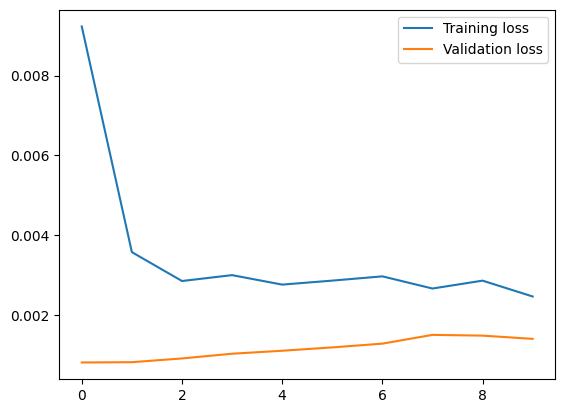

In [155]:
plt.plot(DFFNN_history.history['loss'], label='Training loss')
plt.plot(DFFNN_history.history['val_loss'], label='Validation loss')
plt.legend()

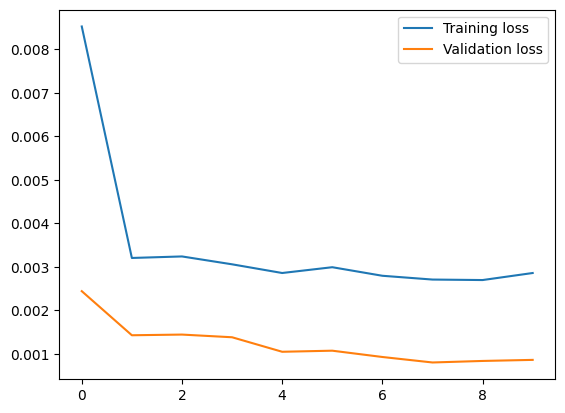

In [156]:
plt.plot(LSTM_history.history['loss'], label='Training loss')
plt.plot(LSTM_history.history['val_loss'], label='Validation loss')
plt.legend()

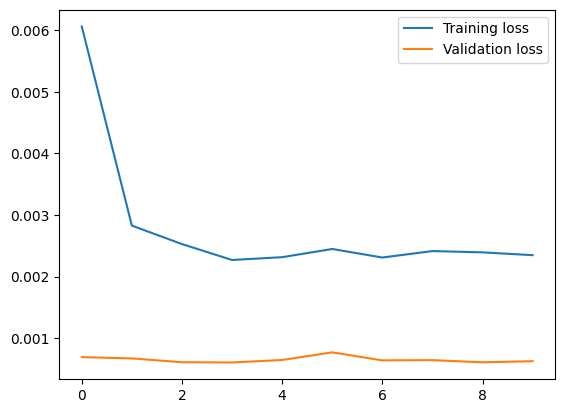

In [157]:
plt.plot(GRU_history.history['loss'], label='Training loss')
plt.plot(GRU_history.history['val_loss'], label='Validation loss')
plt.legend()

### Model Evaluation

In this subsection, we will evaluate the model's performance using different metrics and methods to assess its ability to generalize and make predictions on unseen data.


#### Performance on the Test Set

To evaluate the model, we will compare the **predicted values** against the **actual target values** from the test set. Specifically, we will plot the predicted values alongside the true values to visually assess the model's performance.

It is important to note that each prediction is made using a sliding window of `n_past` previous time steps. For instance, if `n_past = 5`, the prediction for each target is based on the last 5 time steps. This means that for a test series of length `t1, t2, ..., t10`, we can make predictions using the following approach:

- Use `t1, t2, t3, t4, t5` to predict `t6`.  
- Use `t2, t3, t4, t5, t6` to predict `t7`.  
- Use `t3, t4, t5, t6, t7` to predict `t8`.  
- And so on

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


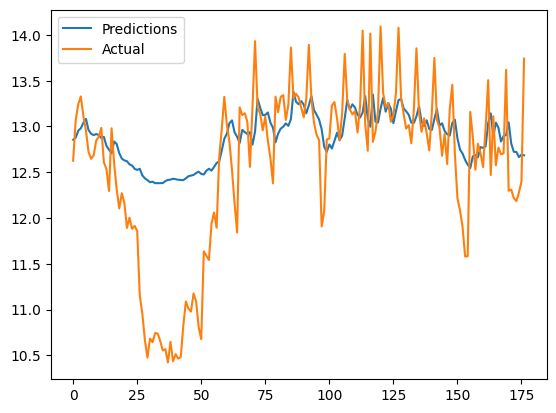

In [158]:
predictions = DFFNN_model.predict(test_generator)
predictions = scaler.inverse_transform(predictions.flatten().reshape(-1, 1))
actual = scaler.inverse_transform(test.flatten()[n_past:].reshape(-1, 1))
plt.plot(predictions, label='Predictions')
plt.plot(actual, label='Actual')
plt.legend()

plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


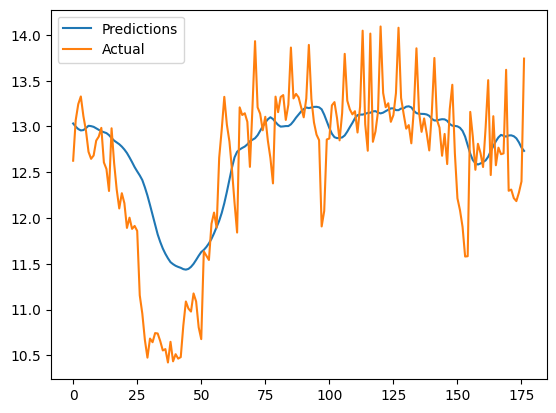

In [159]:
predictions = LSTM_model.predict(test_generator)
predictions = scaler.inverse_transform(predictions.flatten().reshape(-1, 1))
actual = scaler.inverse_transform(test.flatten()[n_past:].reshape(-1, 1))
plt.plot(predictions, label='Predictions')
plt.plot(actual, label='Actual')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


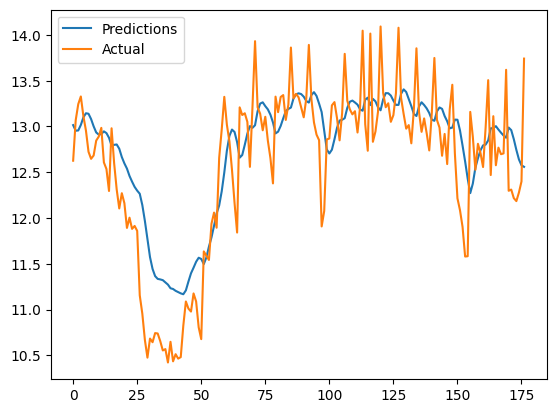

In [160]:
predictions = GRU_model.predict(test_generator)
predictions = scaler.inverse_transform(predictions.flatten().reshape(-1, 1))
actual = scaler.inverse_transform(test.flatten()[n_past:].reshape(-1, 1))
plt.plot(predictions, label='Predictions')
plt.plot(actual, label='Actual')
plt.legend()
plt.show()

#### Predicting Data at Clusters  

As previously mentioned, the **Cluster 0** was used to train our model. To evaluate how well the model generalizes, we will use it to predict data from other clusters, specifically focusing on **Cluster 3** and **Cluster 8**.  

For this evaluation:  
- The cluster ID can be freely changed (ranging from $0$ to $9$) to test the model’s performance on different clusters.  
- Additionally, $n$ (the index of the census - city within a cluster) can be varied to assess how well the predictions align with the actual data across different cities within each cluster.  

This allows us to examine the robustness of our models in capturing usage patterns across diverse clusters and their ability to generalize effectively to unseen data. By plotting the predictions against the actual data for different clusters and cities, we can visually assess how well the models are fitted to the real data.  


In [161]:
# Setting the census index to predict
n = 2

# Setting the cluster ID
cluster_id = 8

932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step


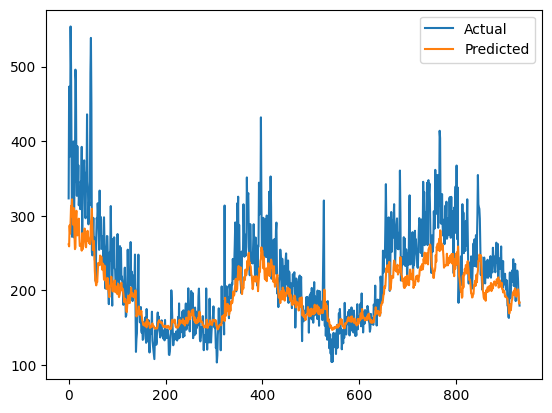

MSE: 2242.977165788765, MAE: 33.47717291834795 R2 Score: 0.5226763332783595


In [162]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Select a test sample and normalize it
df_test = df_train[cluster_mapping[cluster_id][n]].values.reshape(-1, 1)
df_test_normalized = scaler.fit_transform(df_test).flatten()


# Prepare the test data using the same generator
test_generator_actual = TimeseriesGenerator(df_test_normalized, df_test_normalized, length=n_past, batch_size=1)

# Make predictions
predictions = DFFNN_model.predict(test_generator_actual)

# Inverse transform the predictions to original scale
predictions_original = scaler.inverse_transform(predictions)


plt.plot(df_test[n_past:], label='Actual')
plt.plot(predictions_original, label='Predicted')
plt.legend()
plt.show()

# Calculate MSE and MAE
mse = mean_squared_error(df_test[n_past:], predictions_original)
mae = mean_absolute_error(df_test[n_past:], predictions_original)
r2 = r2_score(df_test[n_past:], predictions_original)

print(f'MSE: {mse}, MAE: {mae} R2 Score: {r2}')

932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


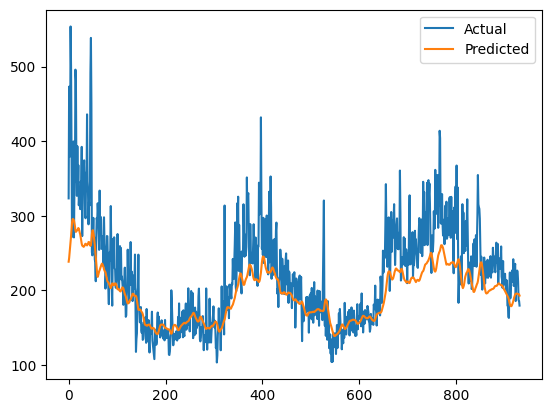

MSE: 2487.8719230053093, MAE: 34.69269957602972 R2 Score: 0.47056074991066177


In [163]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Select a test sample and normalize it
df_test = df_train[cluster_mapping[cluster_id][n]].values.reshape(-1, 1)
df_test_normalized = scaler.fit_transform(df_test).flatten()


# Prepare the test data using the same generator
test_generator_actual = TimeseriesGenerator(df_test_normalized, df_test_normalized, length=n_past, batch_size=1)

# Make predictions
predictions = LSTM_model.predict(test_generator_actual)

# Inverse transform the predictions to original scale
predictions_original = scaler.inverse_transform(predictions)


plt.plot(df_test[n_past:], label='Actual')
plt.plot(predictions_original, label='Predicted')
plt.legend()
plt.show()

# Calculate MSE and MAE
mse = mean_squared_error(df_test[n_past:], predictions_original)
mae = mean_absolute_error(df_test[n_past:], predictions_original)
r2 = r2_score(df_test[n_past:], predictions_original)

print(f'MSE: {mse}, MAE: {mae} R2 Score: {r2}')

932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


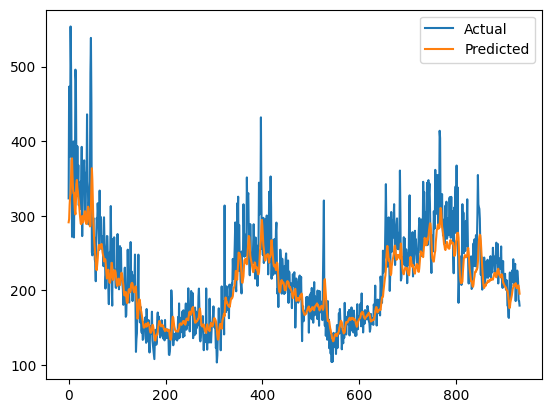

MSE: 1501.7633182526888, MAE: 26.759637967993232 R2 Score: 0.6804126298965902


In [164]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Select a test sample and normalize it
df_test = df_train[cluster_mapping[cluster_id][n]].values.reshape(-1, 1)
df_test_normalized = scaler.fit_transform(df_test).flatten()


# Prepare the test data using the same generator
test_generator_actual = TimeseriesGenerator(df_test_normalized, df_test_normalized, length=n_past, batch_size=1)

# Make predictions
predictions = GRU_model.predict(test_generator_actual)

# Inverse transform the predictions to original scale
predictions_original = scaler.inverse_transform(predictions)


plt.plot(df_test[n_past:], label='Actual')
plt.plot(predictions_original, label='Predicted')
plt.legend()
plt.show()

# Calculate MSE and MAE
mse = mean_squared_error(df_test[n_past:], predictions_original)
mae = mean_absolute_error(df_test[n_past:], predictions_original)
r2 = r2_score(df_test[n_past:], predictions_original)

print(f'MSE: {mse}, MAE: {mae} R2 Score: {r2}')

### Hyperparameter Tuning  

After carefully analyzing the performance of the previous models, we have determined that the **GRU** architecture is the most suitable for our dataset. It demonstrates a strong ability to generalize to other clusters while maintaining high accuracy. To further improve its performance, we will perform **hyperparameter tuning** using the GRU architecture.  

For this purpose, we will utilize **Bayesian Optimization** within the **Keras Tuner** framework. Bayesian Optimization is a probabilistic model-based approach that efficiently searches for the best hyperparameters by leveraging prior evaluations to guide the search process. This method is particularly effective compared to traditional grid or random search methods, as it reduces the number of evaluations required to find optimal hyperparameter values.  

We have also created a function called `tune_gru_model`, whose detailed description can be found in the function definition.  

In [165]:
def tune_gru_model(train_generator, test_generator, project_name, n_past=1, max_trials=30, executions_per_trial=1, epochs=10, verbose=False):
    """
    Perform hyperparameter tuning for a GRU model using Keras Tuner's Bayesian Optimization.

    Parameters:
        train_generator: The training data generator.
        test_generator: The testing/validation data generator.
        project_name: Name of the Keras Tuner project.
        max_trials: Maximum number of trials for hyperparameter tuning.
        executions_per_trial: Number of executions per trial to average results.
        epochs: Number of epochs to train each model during tuning.

    Returns:
        The best hyperparameter-tuned model.
    """
    def build_model(hp):
        model = Sequential()

        # Add GRU layers with tunable units
        model.add(GRU(units=hp.Int('gru_units_1', min_value=64, max_value=256, step=32),
                      input_shape=(n_past, 1),
                      return_sequences=True))
        model.add(GRU(units=hp.Int('gru_units_2', min_value=64, max_value=256, step=32),
                      return_sequences=True))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

        # Add a third GRU layer
        model.add(GRU(units=hp.Int('gru_units_3', min_value=32, max_value=128, step=16),
                      return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1))

        # Compile the model with tunable learning rate
        model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                      loss='mse')

        return model

    # Initialize the Keras Tuner with Bayesian Optimization
    tuner = kt.BayesianOptimization(
        build_model,
        objective='val_loss',
        max_trials=max_trials,
        executions_per_trial=executions_per_trial,
        directory='GRU Bayesian',
        project_name=project_name
    )

    # Perform the search
    tuner.search(train_generator, validation_data=test_generator, epochs=epochs)

    # Get the optimal hyperparameters and model
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    if verbose:
        print(f"""
        The optimal number of units in the first GRU layer is {best_hps.get('gru_units_1')},
        in the second GRU layer is {best_hps.get('gru_units_2')},
        and in the third GRU layer is {best_hps.get('gru_units_3')}.
        The optimal dropout rates are {best_hps.get('dropout_1')} and {best_hps.get('dropout_2')}.
        The optimal optimizer is {best_hps.get('optimizer')}.
        """)

    # Build the best model
    best_model = tuner.hypermodel.build(best_hps)
    return best_model

# Define the project name
project_name = '1_day_prediction'

# Perform hyperparameter tuning with Hyperband
best_model = tune_gru_model(
    train_generator=train_generator,
    test_generator=test_generator,
    project_name=project_name,
    max_trials=30,
    executions_per_trial=2,
    n_past=n_past
)

# Train the best model
best_history = best_model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=False)

Trial 30 Complete [00h 00m 25s]
val_loss: 0.000527101248735562

Best val_loss So Far: 0.0004894721496384591
Total elapsed time: 00h 11m 47s
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0192 - val_loss: 9.0949e-04
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - val_loss: 6.4963e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - val_loss: 6.1444e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - val_loss: 7.9362e-04
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0031 - val_loss: 6.8635e-04
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032 - val_loss: 7.1189e-04
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0029 - val_loss: 7.6982e-04
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0031 - val_loss: 8.5139e-04
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0031 - val_loss: 8.9099e-04
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss:

### General Evaluations  

After obtaining the **best_model**, which has been fine-tuned through hyperparameter optimization, we aim to perform deeper evaluations and visualizations of the model's results. To achieve this, we have implemented the following functions:  





#### 1. evaluate_time_series
   - This function is designed to evaluate the model's performance across multiple time series.  
   - It works as follows:  
     - Takes as input a dataframe containing several temporal series.  
     - Randomly samples a maximum of 100 time series from the dataframe.  
     - For each sampled time series:  
       - Makes predictions using the model.  
       - Computes two error metrics:  
         - **Mean Absolute Percentage Error (MAPE)**  
         - **Symmetric Mean Absolute Percentage Error (sMAPE)**  
     - Returns the **average MAPE and sMAPE** across all sampled time series.  
   - We will use this function to quantitatively assess how well the model is predicting the entire dataset.

In [166]:
def evaluate_time_series(df, n_past, model):
    """
    Evaluate a dataframe of time series data using a trained model.

    Parameters:
        df (pd.DataFrame): The dataframe containing time series data.
        n_past (int): The number of past time steps to use for prediction.
        model: The trained model to use for predictions.

    Returns:
        dict: A dictionary containing the average MAPE, and SMAPE across all series.
    """
    mae_list = []
    smape_list = []

    scaler = MinMaxScaler()

    # Sample 100 columns if the number of columns exceeds 100
    if len(df.columns) > 100:
        df = df.sample(n=100, axis=1, random_state=42)

    # Iterate over all series in the dataframe
    for col in tqdm(df.columns):
        # Select the series and normalize it
        df_test = df[col].values.reshape(-1, 1)
        df_test_normalized = scaler.fit_transform(df_test).flatten()

        # Prepare the test data using TimeseriesGenerator
        test_generator_actual = TimeseriesGenerator(df_test_normalized, df_test_normalized, length=n_past, batch_size=1)

        # Make predictions
        predictions = model.predict(test_generator_actual, verbose=0)

        # Inverse transform the predictions to the original scale
        predictions_original = scaler.inverse_transform(predictions)

        # Calculate metrics
        actual = df_test[n_past:]
        mae = mean_absolute_error(actual, predictions_original)
        smape = 100 * np.mean(2 * np.abs(actual - predictions_original) / (np.abs(actual) + np.abs(predictions_original)))

        # Append metrics to lists
        mae_list.append(mae)
        smape_list.append(smape)

    # Calculate averages
    avg_mae = np.mean(mae_list)
    avg_smape = np.mean(smape_list)

    # Return the results as a dictionary
    return {
        'Average MAE': avg_mae,
        'Average SMAPE': avg_smape
    }

evaluate_time_series(df_train, n_past,  best_model)

100%|██████████| 100/100 [03:49<00:00,  2.30s/it]


{'Average MAE': 12.022817505737526, 'Average SMAPE': 12.142791535464955}

#### 2. sample_and_plot_predictions
   - This function provides a visual evaluation of the model's performance.  
   - It works similarly to `evaluate_time_series`, but instead of computing error metrics:  
     - It samples n time series from the dataframe.  
     - For each sampled time series, it plots:  
       - The **actual values** (Blue line).  
       - The **predicted values** (Red line).  
   - This function is particularly useful for understanding the model's behavior through visualization.  


In [167]:
def sample_and_plot_predictions(df, n_samples, model, n_past, seed = 42):
    """
    Sample time series from a dataset, generate predictions, and plot them with actual data in a 2-column grid using Plotly.

    Parameters:
        df (pd.DataFrame): The dataframe containing time series data.
        n_samples (int): The number of time series to sample and plot.
        model: The trained model to use for predictions.
        n_past (int): The number of past time steps used for prediction.

    Returns:
        None: Displays the plot.
    """

    # Ensure n_samples does not exceed the number of columns in the dataframe
    n_samples = min(n_samples, len(df.columns))

    # Randomly sample n_samples columns from the dataframe
    sampled_columns = df.sample(n=n_samples, axis=1, random_state=seed)

    # Determine the number of rows for the grid (2 columns)
    n_rows = int(np.ceil(n_samples / 2))

    # Create a subplot grid with 2 columns and n_rows rows
    fig = make_subplots(rows=n_rows, cols=2, subplot_titles=sampled_columns.columns)

    # Define consistent colors for actual and predicted data
    actual_color = 'blue'
    prediction_color = 'red'

    # Add tqdm to track progress
    for i, col in enumerate(tqdm(sampled_columns.columns, desc="Processing Time Series")):
        row = (i // 2) + 1  # Determine the row index
        col_pos = (i % 2) + 1  # Determine the column index

        # Select the series and normalize it
        scaler = MinMaxScaler()
        df_test = df[col].values.reshape(-1, 1)
        df_test_normalized = scaler.fit_transform(df_test).flatten()

        # Prepare the test data using TimeseriesGenerator
        test_generator = TimeseriesGenerator(df_test_normalized, df_test_normalized, length=n_past, batch_size=1)

        # Make predictions
        predictions = model.predict(test_generator, verbose=0)

        # Inverse transform the predictions to the original scale
        predictions_original = scaler.inverse_transform(predictions)

        # Get the actual values corresponding to the predictions
        actual = df_test[n_past:]

        # Add the actual data to the subplot
        fig.add_trace(
            go.Scatter(
                x=np.arange(len(actual)),
                y=actual.flatten(),  # Actual values
                mode='lines',
                name='Actual',
                line=dict(color=actual_color),
                showlegend=(i == 0)
            ),
            row=row,
            col=col_pos
        )

        # Add the predicted data to the subplot
        fig.add_trace(
            go.Scatter(
                x=np.arange(len(predictions_original)),
                y=predictions_original.flatten(),  # Predicted values
                mode='lines',
                name='Prediction',
                line=dict(color=prediction_color),
                showlegend=(i == 0)
            ),
            row=row,
            col=col_pos
        )

    # Update layout for better visualization
    fig.update_layout(
        height=300 * n_rows,
        width=1500,
        title_text="Sampled Time Series: Predictions vs Actual Data",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2,
            xanchor="center",
            x=0.5
        )
    )

    # Show the plot
    fig.show()

sample_and_plot_predictions(df_train, 10, best_model, n_past)

Processing Time Series: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


#### plot_n_predictions
   - This function allows for a more localized visualization of the model's predictions.  
   - It works as follows:  
     - Takes as input a single time series.  
     - Samples n intervals of size `n_step` from the time series.  
     - For each interval, it plots:  
       - The **sampled interval** (Blue line).  
       - The **actual future value** (Gree dot).  
       - The **predicted future value** (Red cross).  
   - This function is helpful for analyzing the model's performance at a finer, more granular level.  

In [168]:
def plot_n_predictions(series, model, n_past, n_samples, seed=42):
    """
    Predict the entire test dataset, sample N points, and plot the input data (x_input),
    predicted values (y_pred), and actual values (y_actual).

    Parameters:
        series (pd.Series): The time series data (e.g., df['column_name']).
        model: The trained model to use for predictions.
        n_past (int): The number of past time steps used for prediction.
        n_samples (int): The number of test samples to plot.
        seed (int): Random seed for reproducibility of sampling. Default is 42.

    Returns:
        None: Displays the plots.
    """
    # Set the random seed for reproducibility
    np.random.seed(seed)

    # Normalize the time series
    scaler = MinMaxScaler()
    time_series_normalized = scaler.fit_transform(series.values.reshape(-1, 1)).flatten()

    # Split into training and testing data
    train_size = int(len(time_series_normalized) * 0.9)
    test_data = time_series_normalized

    # Create TimeseriesGenerator for testing
    test_generator = TimeseriesGenerator(test_data, test_data, length=n_past, batch_size=1)

    # Predict the entire test dataset
    y_pred_normalized = model.predict(test_generator, verbose=0)

    # Inverse transform the predictions and actual values
    y_pred = scaler.inverse_transform(y_pred_normalized)
    y_actual = scaler.inverse_transform(test_data[n_past:].reshape(-1, 1))

    # Extract the input data used for predictions
    x_inputs = [test_data[i:i + n_past] for i in range(len(test_data) - n_past)]
    x_inputs = scaler.inverse_transform(np.array(x_inputs))

    # Randomly sample N points
    indices = np.random.choice(len(y_pred), size=n_samples, replace=False)

    # Create subplots with 2 columns
    n_rows = int(np.ceil(n_samples / 2))
    fig = make_subplots(rows=n_rows, cols=2, subplot_titles=[f"Sample {i+1}" for i in range(n_samples)])

    # Process each sample with tqdm progress bar
    for i, idx in enumerate(tqdm(indices, desc="Processing Samples")):
        row = (i // 2) + 1
        col = (i % 2) + 1

        # Data used for prediction
        fig.add_trace(
            go.Scatter(
                x=list(range(n_past)),
                y=x_inputs[idx],
                mode='lines',
                name='Input Data',
                line=dict(color='blue'),
                showlegend=(i == 0)
            ),
            row=row, col=col
        )

        # Actual target value
        fig.add_trace(
            go.Scatter(
                x=[n_past],
                y=[y_actual[idx][0]],
                mode='markers',
                name='Actual Target',
                marker=dict(color='green', size=10, symbol='circle'),
                showlegend=(i == 0)
            ),
            row=row, col=col
        )

        # Predicted target value
        fig.add_trace(
            go.Scatter(
                x=[n_past],
                y=[y_pred[idx][0]],
                mode='markers',
                name='Predicted Target',
                marker=dict(color='red', size=10, symbol='x'),
                showlegend=(i == 0)
            ),
            row=row, col=col
        )

    # Update layout
    column_name = series.name if series.name else "Time Series Data"  # Use column name or default title
    fig.update_layout(
        height=300 * n_rows,  # Adjust height based on the number of rows
        width=1000,
        title_text=f"Predictions vs Actuals for '{column_name}'",
        legend=dict(
            orientation="h",  # Horizontal legend
            yanchor="bottom",
            y=-0.2,  # Position below the plot
            xanchor="center",
            x=0.5
        ),
        margin=dict(t=100)  # Add margin above the graph
    )

    # Adjust y-axis range to add more margin above the data
    for i, idx in enumerate(indices):
        max_y = max(max(x_inputs[idx]), y_actual[idx][0], y_pred[idx][0])
        fig.update_yaxes(
            range=[0, max_y * 1.2],  # Add 20% margin above the maximum value
            row=(i // 2) + 1,
            col=(i % 2) + 1
        )

    # Show the plot
    fig.show()

Plotting the predictions for a time series from **Cluster 0**.


In [169]:
plot_n_predictions(df_train[cluster_mapping[0][0]], best_model, n_past, 6)

Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 645.21it/s]


Plotting the predictions for a time series from **Cluster 8**.

In [170]:
plot_n_predictions(df_train[cluster_mapping[8][0]], best_model, n_past, 6, seed = 10)

Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 1000.19it/s]


### Accumulation Water Predictions  

While our model has shown high accuracy on our dataset, its prediction horizon is limited to 1 day, which may not be sufficient for making administrative decisions. To address this, we will evaluate how well the model generalizes to **accumulated water predictions**. This means that instead of predicting daily consumption, we will sum the consumption over a period of `accumulation_days` days and use this aggregated data to predict the next `accumulation_days` days.  

To compute the accumulated water consumption, we created a function called `accumulate_water` that uses the `accumulation_days` variable to sum water consumption over a specified number of days. This function helps transform the daily consumption data into accumulated values, which can then be used for predictions.  

In [171]:
def accumulate_water(df, accumulation_days):
    """
    Accumulates water values over a specified number of days (accumulation_days).

    Parameters:
        df (pd.DataFrame): The input DataFrame with a date index and water values as columns.
        accumulation_days (int): The number of days to accumulate water values.

    Returns:
        pd.DataFrame: A new DataFrame with accumulated values, dropping incomplete intervals.
    """
    # Ensure the DataFrame index is reset to integers for grouping
    df = df.reset_index(drop=True)

    # Calculate the number of complete intervals
    num_rows = len(df)
    complete_intervals = num_rows // accumulation_days

    # Drop rows that don't fit into complete intervals
    df = df.iloc[:complete_intervals * accumulation_days]

    # Group rows by accumulation intervals and sum the values
    accumulated_df = df.groupby(df.index // accumulation_days).sum()

    return accumulated_df

#### Error and Visualization  

We will use the functions defined earlier to evaluate the error and visualize the performance of our **best_model** on accumulated water predictions. Specifically, we will analyze the model's performance for water accumulation over **15 days** and **30 days**.  


In [172]:
fifteen_days_df = accumulate_water(df_train, 15)
print(evaluate_time_series(fifteen_days_df, n_past, best_model))
sample_and_plot_predictions(fifteen_days_df, 10, best_model, n_past)

plot_n_predictions(fifteen_days_df[cluster_mapping[cluster_id][0]], best_model, n_past, 6)

100%|██████████| 100/100 [00:17<00:00,  5.65it/s]


{'Average MAE': 176.71018836128587, 'Average SMAPE': 9.61712496754666}


Processing Time Series: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]


Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 666.61it/s]


In [173]:
thirty_days_df = accumulate_water(df_train, 30)
print(evaluate_time_series(thirty_days_df, n_past, best_model))
sample_and_plot_predictions(fifteen_days_df, n_past, best_model, n_past)

plot_n_predictions(thirty_days_df[cluster_mapping[cluster_id][0]], best_model, n_past, 6)


100%|██████████| 100/100 [00:09<00:00, 11.03it/s]


{'Average MAE': 585.677516581605, 'Average SMAPE': 10.118251203418856}


Processing Time Series: 100%|██████████| 12/12 [00:01<00:00,  6.81it/s]


Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 1000.47it/s]


We observe that the model performs exceptionally well, even on the accumulated water dataset for both **15-day** and **30-day** periods. This raises a natural question: would a dedicated model specifically designed to predict accumulated water consumption outperform the current **best_model**?  


### Training Specific Accumulation Prediction Models  

To address the previous question, we will train two additional models using the GRU architecture. These models will be trained on datasets with **15-day water accumulation** and **30-day water accumulation**, respectively.  

We will then evaluate their performance to determine whether these specialized models can outperform the current **best_model** in predicting accumulated water consumption.


In [174]:
def create_timeseries_generators(cluster_mean, n_past, batch_size=16, train_split=0.8):
    """
    Creates TimeseriesGenerators for training and testing data using the provided cluster mean.

    Parameters:
        cluster_mean: Array-like, the mean of the cluster data (1D array or Series).
        n_past: Number of past time steps to use as input for the generator.
        batch_size: Batch size for the TimeseriesGenerator (default: 16).
        train_split: Proportion of data to use for training (default: 0.8).

    Returns:
        train_generator: TimeseriesGenerator for training data.
        test_generator: TimeseriesGenerator for testing data.
    """
    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(cluster_mean.values.reshape(-1, 1))

    # Calculate the split index for train and test data
    train_size = int(len(scaled_data) * train_split)

    # Split the data into training and testing sets
    train = scaled_data[:train_size].mean(axis=1)
    test = scaled_data[train_size:].mean(axis=1)

    # Create the TimeseriesGenerator for training data
    train_generator = TimeseriesGenerator(train, train,
                                          length=n_past, batch_size=batch_size)

    # Create the TimeseriesGenerator for testing data
    test_generator = TimeseriesGenerator(test, test,
                                         length=n_past, batch_size=batch_size)

    return train_generator, test_generator

In [175]:
cluster_id = 0

fifteen_days_df_cluster = fifteen_days_df[cluster_mapping[cluster_id]]

fifteen_days_df_cluster_mean = fifteen_days_df_cluster.mean(axis=1)

fifteen_days_train_generator, fifteen_days_test_generator = create_timeseries_generators(fifteen_days_df_cluster_mean, n_past=n_past, batch_size=batch_size, train_split=0.8)

project_name = '15_days_prediction'

fifteen_days_best_model = tune_gru_model(train_generator=fifteen_days_train_generator,
                            test_generator=fifteen_days_test_generator,
                            project_name=project_name,
                            max_trials=30,
                            executions_per_trial=2,
                            epochs=10,
                            n_past = n_past)

fifteen_days_history = fifteen_days_best_model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=False)



Trial 30 Complete [00h 00m 15s]
val_loss: 0.0004465470992727205

Best val_loss So Far: 1.958553582426248e-06
Total elapsed time: 00h 07m 24s
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0212 - val_loss: 8.1723e-04
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 7.7771e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042 - val_loss: 6.6209e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 6.5769e-04
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - val_loss: 6.5175e-04
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - val_loss: 6.5611e-04
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - val_loss: 6.1568e-04
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 6.6262e-04
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 6.2737e-04
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 

In [176]:
evaluate_time_series(fifteen_days_df, n_past, fifteen_days_best_model)

100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


{'Average MAE': 187.16048855926726, 'Average SMAPE': 10.691320000881904}

In [177]:
plot_n_predictions(fifteen_days_df[cluster_mapping[0][0]], fifteen_days_best_model, n_past, 6)

plot_n_predictions(fifteen_days_df[cluster_mapping[8][0]], fifteen_days_best_model, n_past, 6)

Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 856.91it/s]


Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 997.50it/s]


In [178]:
thirty_days_df_cluster = thirty_days_df[cluster_mapping[cluster_id]]

thirty_days_df_cluster_mean = thirty_days_df_cluster.mean(axis=1)

thirty_days_train_generator, thirty_days_test_generator = create_timeseries_generators(thirty_days_df_cluster_mean, n_past=n_past, batch_size=batch_size, train_split=0.5)


project_name = '30_days_prediction'
thirty_days_best_model = tune_gru_model(train_generator=thirty_days_train_generator,
                            test_generator=thirty_days_test_generator,
                            project_name=project_name,
                            max_trials=30,
                            executions_per_trial=2,
                            epochs=10,
                            n_past = n_past)

thirty_days_history = thirty_days_best_model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=False)



Trial 30 Complete [00h 00m 16s]
val_loss: 0.005276935640722513

Best val_loss So Far: 0.0051901082042604685
Total elapsed time: 00h 08m 24s
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0224 - val_loss: 0.0013
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0015
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - val_loss: 0.0016
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0014
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - val_loss: 0.0015
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0019


In [179]:
evaluate_time_series(thirty_days_df, n_past, thirty_days_best_model)

100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


{'Average MAE': 713.5831468516305, 'Average SMAPE': 13.786697334197957}

We can see that these new models are not as accurate as the **best_model**. This discrepancy could be attributed to several factors:

1. **Reduced Dataset Size**: By using accumulated datasets, we are effectively shrinking our dataset, which results in significantly less data available for training. This reduction can lead to underfitting, where the model fails to capture the underlying patterns in the data, ultimately resulting in poor performance.

2. **Univariable Prediction Approach**: Since we are employing a univariable prediction model without incorporating time variables (such as the day or month of the year), the model learns patterns of water consumption independently of the time period. This approach allows the model to potentially generalize the dataset for accumulated water usage more effectively, as the absence of temporal context may enhance its overall predictive capabilities.




### Wrapping Up and Saving the Model

After completing the training process, we will save our model for future use. Additionally, we will train models using the same architecture for other usage categories, such as **Industrial** and **Commercial**. These models will then be evaluated to determine their accuracy and effectiveness in predicting water consumption across different contexts.


#### Saving the model

In [180]:
best_model.save('domestic_best_model.keras')

#### Loading the model

In [181]:

loaded_model = load_model('domestic_best_model.keras')

### Packaging the Training Pipeline

We will package the entire process for training the optimal model into a streamlined pipeline. This includes the necessary cells to ensure a smooth workflow.

**Note:** Although we directly load the preprocessed file during this process, you may still need to execute the preprocessing code at the beginning of the notebook to generate the preprocessed dataset. This ensures the data is correctly prepared and ready to be fed into the pipeline for training.


In [182]:
usage = "domestic"

path = f"{usage}/"

df_train = pd.read_csv(path + 'data.csv', index_col='Data/Fecha/Date')

In [183]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train)

In [184]:
n = 30
elbow_method(df_scaled, n)

In [185]:
n = 10
cluster_mapping, data_scaled, cluster_df = cluster_knn(df_train, n)

In [186]:
cluster_columns = cluster_mapping[cluster_id]

cluster_data = df_train[cluster_columns]

x, y = cluster_data.shape

cluster_data.head()

0801502007 - BADALONA  0801502011 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   26.475248              16.456204   
2021-06-02                   23.590476              17.170909   
2021-06-03                   23.435185              16.133094   
2021-06-04                   23.000000              15.571942   
2021-06-05                   20.026549              17.063830   

                 0801503001 - BADALONA  0801504008 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   18.436275              21.008658   
2021-06-02                   19.320588              22.542735   
2021-06-03                   19.249755              23.872881   
2021-06-04                   19.683643              23.741525   
2021-06-05                   23.265426              27.561181   

                 0801504010 - BADALONA  0801505004 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   37.639344              21.051988   
2021-06-02                   31.409836              20.603659   
2021-06-03                   32.311475              22.600610   
2021-06-04                   32.557377              19.932927   
2021-06-05                   30.193548              21.378049   

                 0801507003 - BADALONA  0801507018 - BADALONA  \
Data/Fecha/Date                                                 
2021-06-01                   66.892857              25.528736   
2021-06-02                   57.200000              24.459770   
2021-06-03                   66.066667              26.770115   
2021-06-04                   63.100000              27.310345   
2021-06-05                   71.100000              26.919540   

                 0801507020 - BADALONA  0801507021 - BADALONA  ...  \
Data/Fecha/Date                                                ...   
2021-06-01                   23.912088              48.761905  ...   
2021-06-02                   23.109890              58.687500  ...   
2021-06-03                   24.142857              48.546875  ...   
2021-06-04                   22.483516              52.500000  ...   
2021-06-05                   22.780220              57.265625  ...   

                 0810106021 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                               9.140496   
2021-06-02                               9.287190   
2021-06-03                               9.349174   
2021-06-04                               8.576446   
2021-06-05                               9.921488   

                 0810106022 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                               6.616883   
2021-06-02                               6.490260   
2021-06-03                               6.701299   
2021-06-04                               6.366883   
2021-06-05                               6.857143   

                 0810106023 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                                 10.602   
2021-06-02                                 10.666   
2021-06-03                                 10.260   
2021-06-04                                 10.198   
2021-06-05                                 11.142   

                 0810106024 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                               7.663014   
2021-06-02                               8.663014   
2021-06-03                               8.523288   
2021-06-04                               7.509589   
2021-06-05                               7.657534   

                 0810106025 - L'HOSPITALET LLOBR.  \
Data/Fecha/Date                                     
2021-06-01                              10.371158   
2021-06-02                              10.517730   
20

In [187]:
cluster_columns = df_train[cluster_mapping[cluster_id]]

cluster_mean = cluster_columns.mean(axis=1)

train_generator, test_generator = create_timeseries_generators(cluster_mean, n_past=n_past, batch_size=batch_size, train_split=0.5)


project_name = f'{usage}_days_prediction'

best_model = tune_gru_model(train_generator=train_generator,
                            test_generator=test_generator,
                            project_name=project_name,
                            max_trials=30,
                            executions_per_trial=2,
                            epochs=10,
                            n_past = n_past)

history = best_model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=False)



Trial 30 Complete [00h 00m 31s]
val_loss: 0.0006307215662673116

Best val_loss So Far: 0.0006037259590812027
Total elapsed time: 00h 14m 41s
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0318 - val_loss: 9.5357e-04
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0052 - val_loss: 0.0011
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - val_loss: 9.3288e-04
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - val_loss: 8.7389e-04
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - val_loss: 7.5689e-04
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - val_loss: 7.3005e-04
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - val_loss: 7.4366e-04
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - val_loss: 7.3840e-04
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045

In [188]:
evaluate_time_series(cluster_data, n_past, best_model)

100%|██████████| 100/100 [03:45<00:00,  2.26s/it]


{'Average MAE': 1.1425128947863767, 'Average SMAPE': 7.280616677437835}

In [189]:
sample_and_plot_predictions(cluster_data, 10, best_model, n_past)

Processing Time Series: 100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


In [202]:
plot_n_predictions(df_train[cluster_mapping[8][4]], best_model, n_past, 6)

Processing Samples: 100%|██████████| 6/6 [00:00<00:00, 997.57it/s]


In [203]:
best_model.save(f'{usage}_best_model.keras')